In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('Data Inflasi.xlsx', sheet_name='Data Inflasi').iloc[3:, :3].reset_index(drop=True)
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,No,Periode,Data Inflasi
1,1,April 2023,4.33 %
2,2,Maret 2023,4.97 %
3,3,Februari 2023,5.47 %
4,4,Desember 2022,5.51 %
...,...,...,...
240,240,April 2003,7.62 %
241,241,Maret 2003,7.17 %
242,242,Februari 2003,7.6 %
243,243,Januari 2003,8.68 %


In [ ]:
df.columns = df.iloc[0]
df = df.iloc[1:,:].reset_index(drop=True)[['Periode', 'Data Inflasi']]
df

,Periode,Data Inflasi
0,April 2023,4.33 %
1,Maret 2023,4.97 %
2,Februari 2023,5.47 %
3,Desember 2022,5.51 %
4,November 2022,5.42 %
...,...,...
239,April 2003,7.62 %
240,Maret 2003,7.17 %
241,Februari 2003,7.6 %
242,Januari 2003,8.68 %


In [ ]:
df['Data Inflasi'] = df['Data Inflasi'].str.replace('%', '')
df

,Periode,Data Inflasi
0,April 2023,4.33
1,Maret 2023,4.97
2,Februari 2023,5.47
3,Desember 2022,5.51
4,November 2022,5.42
...,...,...
239,April 2003,7.62
240,Maret 2003,7.17
241,Februari 2003,7.6
242,Januari 2003,8.68


In [ ]:
df2 = df[::-1]
df2 = df2.reset_index(drop=True)
df2

,Periode,Data Inflasi
0,Desember 2002,0
1,Januari 2003,8.68
2,Februari 2003,7.6
3,Maret 2003,7.17
4,April 2003,7.62
...,...,...
239,November 2022,5.42
240,Desember 2022,5.51
241,Februari 2023,5.47
242,Maret 2023,4.97


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Periode       244 non-null    object
 1   Data Inflasi  244 non-null    object
dtypes: object(2)
memory usage: 3.9+ KB


In [ ]:
df2['Data Inflasi'] = df2['Data Inflasi'].astype(float)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Periode       244 non-null    object 
 1   Data Inflasi  244 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


In [ ]:
df2.isnull().sum()

0
Periode         0
Data Inflasi    0
dtype: int64

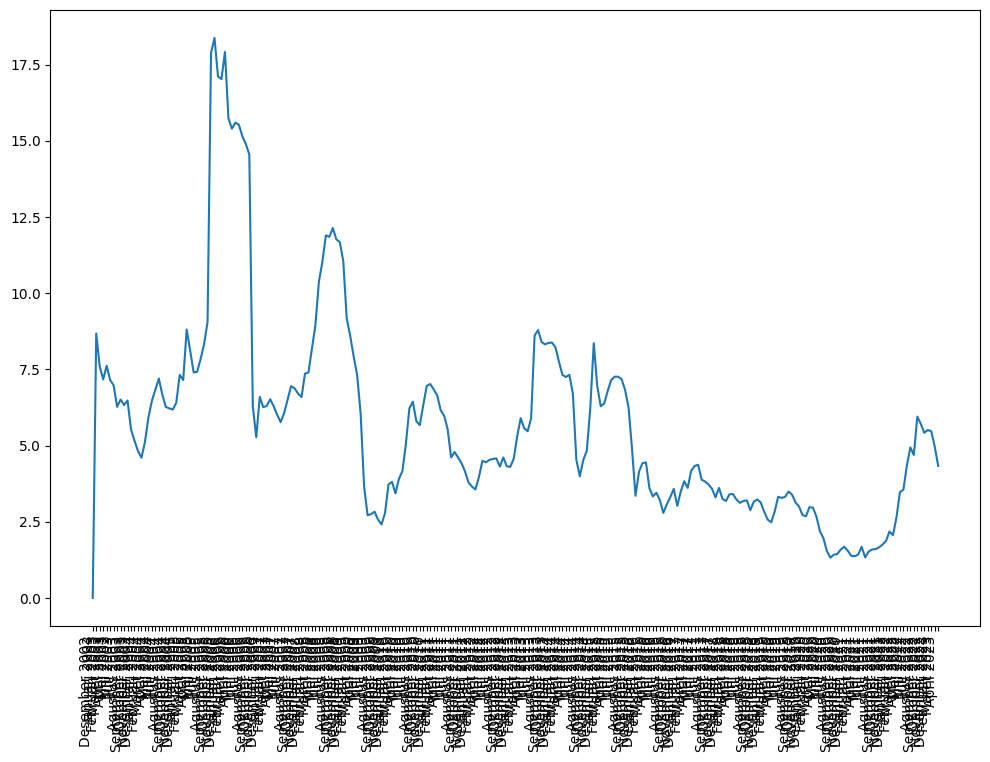

In [ ]:
plt.figure(figsize=(12, 8))

x = df2['Periode']
y = df2['Data Inflasi']


plt.plot(x, y)
plt.xticks(rotation=90, ha='right')

plt.show()


In [ ]:
##window size function many to many method
def window_slide(df, window_size, step_size=1, label_past=1, label_future=1):
    X = df
    y = df

    X_windows, y_windows = [], []
    for i in range(0, len(df) - window_size - label_past - label_future + 1, step_size):
        X_windows.append(X[i:i + window_size])
        past_label = i + window_size - label_past
        future_label = i + window_size + label_future
        y_windows.append(y[past_label:future_label])
    return np.array(X_windows), np.array(y_windows)

In [ ]:
data = df2['Data Inflasi']
data

0      0.00
1      8.68
2      7.60
3      7.17
4      7.62
       ... 
239    5.42
240    5.51
241    5.47
242    4.97
243    4.33
Name: Data Inflasi, Length: 244, dtype: float64

In [ ]:
# Call the window_slide function
window_size = 12
label_column = data
step_size = 1
label_past = 1
label_future = 1
# is_pct = False

X_windows, y_windows = window_slide(data, window_size, step_size, label_past, label_future)

# Print the output
print("X windows:")
print(X_windows.shape)
print("y windows:")
print(y_windows.shape)

X windows:
(231, 12)
y windows:
(231, 2)


In [ ]:
#split data into train, test, valid data
x_train = X_windows[:180]
y_train = y_windows[:180]
x_test = X_windows[181:220]
y_test = y_windows[181:220]
x_valid = X_windows[221:]
y_valid = y_windows[221:]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_valid.shape)
print(y_valid.shape)

(180, 12)
(180, 2)
(39, 12)
(39, 2)
(10, 12)
(10, 2)


<h1> Modelling </h1>

In [ ]:
import tensorflow as tf

In [ ]:
y.shape

(244,)

In [ ]:
#Add dimension
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
x_valid = np.expand_dims(x_valid, axis=-1)
x_train.shape

(180, 12, 1)

extrak fitur dari

In [56]:
#Make architecture

input_ = tf.keras.layers.Input((12,1))
x1 = tf.keras.layers.Conv1D(64, 1, padding='same', activation='relu')(input_)
x2 = tf.keras.layers.Conv1D(64, 3, padding='same', activation='relu')(input_)
x3 = tf.keras.layers.Conv1D(64, 5, padding='same', activation='relu')(input_)

x_concat = tf.keras.layers.Concatenate()([x1, x2, x3])

x = tf.keras.layers.LSTM(64, return_sequences=True)(x_concat)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(32, activation='relu')(x)

output_ = tf.keras.layers.Dense(2, activation = 'linear')(x)
model = tf.keras.Model(input_, output_)
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 12, 1)]      0           []                               
                                                                                                  
 conv1d_24 (Conv1D)             (None, 12, 64)       128         ['input_9[0][0]']                
                                                                                                  
 conv1d_25 (Conv1D)             (None, 12, 64)       256         ['input_9[0][0]']                
                                                                                                  
 conv1d_26 (Conv1D)             (None, 12, 64)       384         ['input_9[0][0]']                
                                                                                            

In [ ]:
model.save('LSTM.h5')

In [57]:
# cek valid loss
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.MeanSquaredError()
)
hist = model.fit(x_train, y_train, epochs = 250, validation_data=(x_valid, y_valid))

Epoch 1/250
6/6 [==============================] - 5s 212ms/step - loss: 36.1858 - val_loss: 4.7606
Epoch 2/250
6/6 [==============================] - 0s 37ms/step - loss: 12.4703 - val_loss: 1.7549
Epoch 3/250
6/6 [==============================] - 0s 41ms/step - loss: 11.9464 - val_loss: 0.5326
Epoch 4/250
6/6 [==============================] - 0s 22ms/step - loss: 8.6730 - val_loss: 0.5500
Epoch 5/250
6/6 [==============================] - 0s 24ms/step - loss: 8.4749 - val_loss: 0.5475
Epoch 6/250
6/6 [==============================] - 0s 22ms/step - loss: 7.2229 - val_loss: 0.6159
Epoch 7/250
6/6 [==============================] - 0s 22ms/step - loss: 6.3836 - val_loss: 1.2935
Epoch 8/250
6/6 [==============================] - 0s 25ms/step - loss: 5.4162 - val_loss: 2.0713
Epoch 9/250
6/6 [==============================] - 0s 23ms/step - loss: 4.5003 - val_loss: 1.3622
Epoch 10/250
6/6 [==============================] - 0s 24ms/step - loss: 3.5595 - val_loss: 1.8332
Epoch 11/250
6/

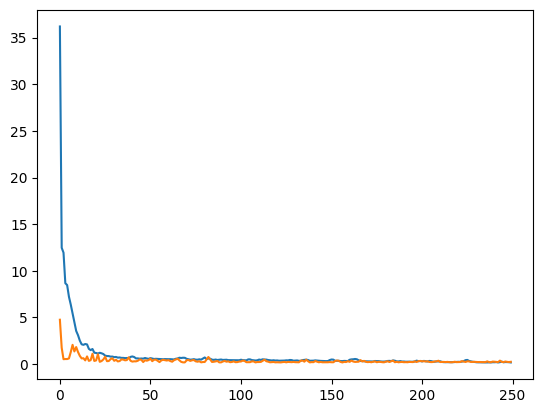

In [59]:
# visualisasi valid loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [60]:
# model predict
y_test_pred = model.predict(x_test)

2/2 [==============================] - 2s 13ms/step


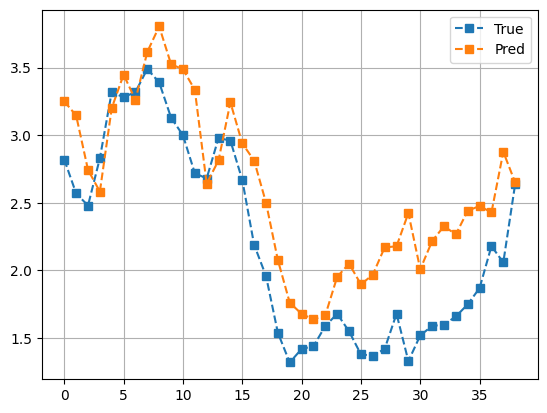

In [61]:
# visualisasi data real dengan data prediksi
plt.plot([i for i in range(len(y_test[:, -1]))], y_test[:, -1], label='True',
         linestyle='dashed', marker='s')
plt.plot([i for i in range(len(y_test[:, -1]))], y_test_pred[:, -1], label='Pred',
         linestyle='dashed', marker='s')

plt.legend()
plt.grid()
plt.show()

In [62]:
PREDICT_FUTURE = 6

curr_data = x_test[-1]
FUTURE_Y = []
for i in range(PREDICT_FUTURE):
  curr_data = np.expand_dims(curr_data, axis=0)
  curr_pred = model.predict(curr_data)
  FUTURE_Y.append(curr_pred.flatten()[-1])

  curr_data = curr_data.flatten()
  fut_data = []
  for d in curr_data[1:]:
    fut_data.append(d)
  fut_data.append(curr_pred.flatten()[-1])
  fut_data = np.array(fut_data)
  fut_data = np.expand_dims(fut_data, axis=-1)
  curr_data = fut_data


1/1 [==============================] - 0s 44ms/step


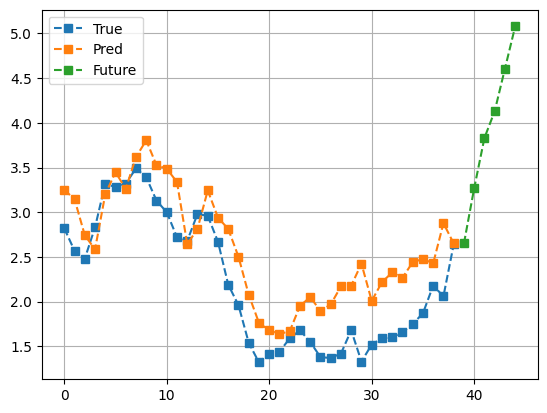

In [63]:
# visualisasi data real, data prediksi awal, dan data prediksi lanjutan.

plt.plot([i for i in range(len(y_test[:, -1]))], y_test[:, -1], label='True',
         linestyle='dashed', marker='s')
plt.plot([i for i in range(len(y_test_pred[:, -1]))], y_test_pred[:, -1], label='Pred',
         linestyle='dashed', marker='s')
plt.plot([i for i in range(len(y_test_pred),
                           len(FUTURE_Y)+len(y_test_pred))],
         FUTURE_Y, label='Future', linestyle='dashed', marker='s')

plt.legend()
plt.grid()
plt.show()

In [ ]:
y_test[:, -1]

array([2.82, 2.57, 2.48, 2.83, 3.32, 3.28, 3.32, 3.49, 3.39, 3.13, 3.  ,
       2.72, 2.68, 2.98, 2.96, 2.67, 2.19, 1.96, 1.54, 1.32, 1.42, 1.44,
       1.59, 1.68, 1.55, 1.38, 1.37, 1.42, 1.68, 1.33, 1.52, 1.59, 1.6 ,
       1.66, 1.75, 1.87, 2.18, 2.06, 2.64])

In [ ]:
y_test_pred[:, -1]

array([3.1079068, 2.910269 , 2.7153907, 2.6065483, 3.0555477, 3.25294  ,
       3.0807555, 3.2832558, 3.6403048, 3.6173787, 3.3912754, 3.1677766,
       2.5563343, 2.4919612, 2.8446927, 2.812399 , 2.6959944, 2.551803 ,
       2.4050655, 2.1459167, 1.9632459, 1.8268942, 1.8626426, 2.1047978,
       2.283381 , 2.246571 , 2.318564 , 2.3543878, 2.1277113, 2.0562038,
       1.5383692, 1.6336639, 1.8756504, 1.9712543, 2.0697215, 2.1077523,
       1.9653752, 2.364228 , 2.2445965], dtype=float32)